In [1]:
import numpy as np
data = np.load("exercise1.npz")
XA1 = data['XA1']
yA1 = data['yA1']
XA2 = data['XA2']
yA2 = data['yA2']

XB1 = data['XB1']
yB1 = data['yB1']
XB2 = data['XB2']
yB2 = data['yB2']
data.close()

In [2]:
from sklearn import linear_model
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


def evaluate_performance(X,y,cv_):
    reg = linear_model.LinearRegression()
    cv_results = cross_validate(reg, X, y, cv=cv_, scoring=('r2','neg_mean_squared_error'))
    sorted(cv_results.keys())
    ['fit_time', 'score_time', 'test_score']
    test_mean_squared_error = -np.mean(cv_results['test_neg_mean_squared_error'])
    test_r2 = np.mean(cv_results['test_r2'])
    return test_mean_squared_error, test_r2



In [3]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def random_forest_feature_selection(X, y, nr_ests = 10):
    rf = RandomForestRegressor(n_estimators = nr_ests, max_depth = 5, min_samples_leaf = 5)
    rf.fit(X, y)
    feature_importance = rf.feature_importances_
    sorted_features = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k])
    #sorted_features = sorted_features.reverse()
    return sorted_features

In [4]:
def filtering(X):
    variance = np.var(X,axis=0)
    sorted_indices = np.argsort(variance) 
    return list(sorted_indices)

In [5]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

def sequential_feature_selector(X,y,nrFeatures,forward_):
    nrFeatures_left = nrFeatures if forward_ else 1
    lr = LinearRegression()
    sfs = SFS(lr, 
              k_features=nrFeatures_left, 
              forward=forward_, 
              floating=False, 
              scoring='neg_mean_squared_error',
              cv=10)
    sfs = sfs.fit(X, y)
    #features = sfs.subsets_[nrFeatures].get("feature_idx", "")
    features = []
    for i in range(1,nrFeatures): 
        perv_features = list(sfs.subsets_[i].get("feature_idx", ""))
        these_features = list(sfs.subsets_[i+1].get("feature_idx", ""))
        #print(perv_features)
        #print(these_features)
        next_feature = [x for x in these_features if x not in perv_features]
        #print(next_feature)
        features.append(next_feature[0])
        #print(features)
    return features


In [6]:
from sklearn.linear_model import ElasticNet as ELN
import numpy as np

def elastic_net(X,y, Alpha, ratio = 0.5):
    coef = []
    #ratio = l1_r
    #Alpha = np.linspace(start,end,steps)#np.logspace(0.1, 0.01, num=10)
    for a in Alpha:
        reg = ELN(alpha=a, copy_X=True, fit_intercept=True, l1_ratio=ratio,
              max_iter=1000, normalize=False, positive=False, precompute=False,
              random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
        reg.fit(X, y) 
        coef.append(reg.coef_.tolist())
    return np.array(coef)

In [7]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def perform_pca(X, nrFeatures):
    pca = PCA(n_components=nrFeatures)
    pca.fit(X) 
    pca_data = pca.fit_transform(X)
    return pca_data

In [11]:
from sklearn.utils.extmath import randomized_svd as svd
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import qr

def truncate_svd(X, nrFeatures):
    X = X.T
    trunc_SVD = TruncatedSVD(n_components=nrFeatures, algorithm='randomized', n_iter=5)
    trunc_SVD.fit(X)
    comp = trunc_SVD.components_
    return comp



In [112]:
import random
import numpy as np
xData = XB2
yData = yB2

nr_pts = 1000
nr_features_to_test = 10 
test_vector = []
scores = np.zeros([1, xData.shape[1]])[0]
for i in range(nr_features_to_test):
    test_vector.append(list(range(xData.shape[1])))

test_vector = [item for sublist in test_vector for item in sublist]
random.shuffle(test_vector)
test_vectore = list(test_vector)

for i in range(XB2.shape[1]): 
    test_vector_i = test_vector[:10]
    test_vector = test_vector[10:len(test_vector)]
    random_points = random.sample(range(0, xData.shape[0]), nr_pts)
    xData_i = xData[:,test_vector_i][random_points]
    print(xData_i.shape)
    yData_i = yData[random_points]
    random_forest_features = random_forest_feature_selection(xData_i, yData_i, nr_ests = 10)[::-1]
    random_forest_features = []

    random_forest_features.append([])
    score = 10
    
    for f in random_forest_features:
        print(random_forest_features)
        scores[f] = scores[f]+score
        scores = scores-1

features_sorted = [x for _,x in sorted(zip(scores,list(range(800))))]

    

    

(1000, 10)
[9, 1, 8, 4, 2, 6, 5, 7, 3, 0]


TypeError: only integer scalar arrays can be converted to a scalar index

In [103]:
features_sorted = [x for _,x in sorted(zip(scores,list(range(800))))]
features_sorted

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191

In [740]:
step = 1
nrFeatures = 50
performance_random_forest = []
performance_step_for = []
performance_step_back = []
performance_pca = []
performance_filter = []
for i in range(1,nrFeatures, step):
    forest_features_i = random_forest_features[:i]
    #step_for_features_i = step_for_features[:i]
    #step_back_features_i = step_back_features[:i]
    pca_data_i = [feature[:i] for feature in pca_features]
    filter_features_i = filter_features[:i]
    
    performance_random_forest.append(evaluate_performance(xData[:,forest_features_i],yData,10))
    #performance_step_for.append(evaluate_performance(xData[:,step_for_features_i],yData,10))
    #performance_step_back.append(evaluate_performance(xData[:,step_back_features_i],yData,10))
    performance_pca.append(evaluate_performance(pca_data_i,yData,10))
    performance_filter.append(evaluate_performance(xData[:,filter_features_i],yData,10))
    
print(performance_filter)

[(3.1757633031990435, -0.006904904629983477), (3.1767818434832966, -0.007260878678679939), (3.1776188778403003, -0.006972542315447805), (3.1802502659061727, -0.008167007750160549), (3.180526508229895, -0.008306537097292899), (3.1794187338259445, -0.00947346146986181), (3.18075219009888, -0.009150029920676716), (3.1818836960167416, -0.009305357216544574), (3.1830053176120474, -0.009676001224768537), (3.192796209354773, -0.01262571391192877), (3.181765843119641, -0.009398518967023895), (3.1903639521284077, -0.012189806796658431), (3.195557623210948, -0.013690522420402685), (3.199124172246049, -0.013707227345676054), (3.2050118022938356, -0.015643696767361548), (3.2058178624089315, -0.01613675783937827), (3.209687277067226, -0.017368549145882584), (3.214458737674312, -0.01872868070814866), (3.2194316289570986, -0.019663911387106235), (3.2250386646198654, -0.020942830761890862), (3.235956126853374, -0.024261004865974024), (3.2527694366486903, -0.029541417998770747), (3.2573454824632604, -0

In [53]:
xData = XB2[range(1000),:]
yData = yB2[range(1000)]
step = 5

nrFeatures =  800 #xData.shape[1]

#performance_random_forest = []
performance_step_for = []
performance_step_back = []
performance_pca = []
performance_filter = []
performance_svd = []

#random_forest_features = random_forest_feature_selection(xData, yData, nr_ests = 100)[::-1]
#print('forest')
pca_features = perform_pca(xData, nrFeatures)
print('pca')
#step_for_features = sequential_feature_selector(xData,yData,nrFeatures,True)
#print('forward')
#step_back_features =  sequential_feature_selector(xData,yData,nrFeatures,False)
#print('backward')
filter_features = filtering(xData)
print('filter')
#svd_features = truncate_svd(xData, nrFeatures)



for i in range(1,nrFeatures,step):
    print(i)
    #forest_features_i = random_forest_features[:i]
    #step_for_features_i = step_for_features[:i]
    #step_back_features_i = step_back_features[:i]
    pca_data_i = [feature[:i] for feature in pca_features]
    filter_features_i = filter_features[:i]
    #svd_features_i = [feature[:i] for feature in svd_features]
    
   # performance_random_forest.append(evaluate_performance(xData[:,forest_features_i],yData,10))
    #performance_step_for.append(evaluate_performance(xData[:,step_for_features_i],yData,10))
    #performance_step_back.append(evaluate_performance(xData[:,step_back_features_i],yData,10))
    performance_pca.append(evaluate_performance(pca_data_i,yData,10))
    performance_filter.append(evaluate_performance(xData[:,filter_features_i],yData,10))

pca
filter
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396
401
406
411
416
421
426
431
436
441
446
451
456
461
466
471
476
481
486
491
496
501
506
511
516
521
526
531
536
541
546
551
556
561
566
571
576
581
586
591
596
601
606
611
616
621
626
631
636
641
646
651
656
661
666
671
676
681
686
691
696
701
706
711
716
721
726
731
736
741
746
751
756
761
766
771
776
781
786
791
796


C:\Users\ErikF\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 432x288 with 0 Axes>

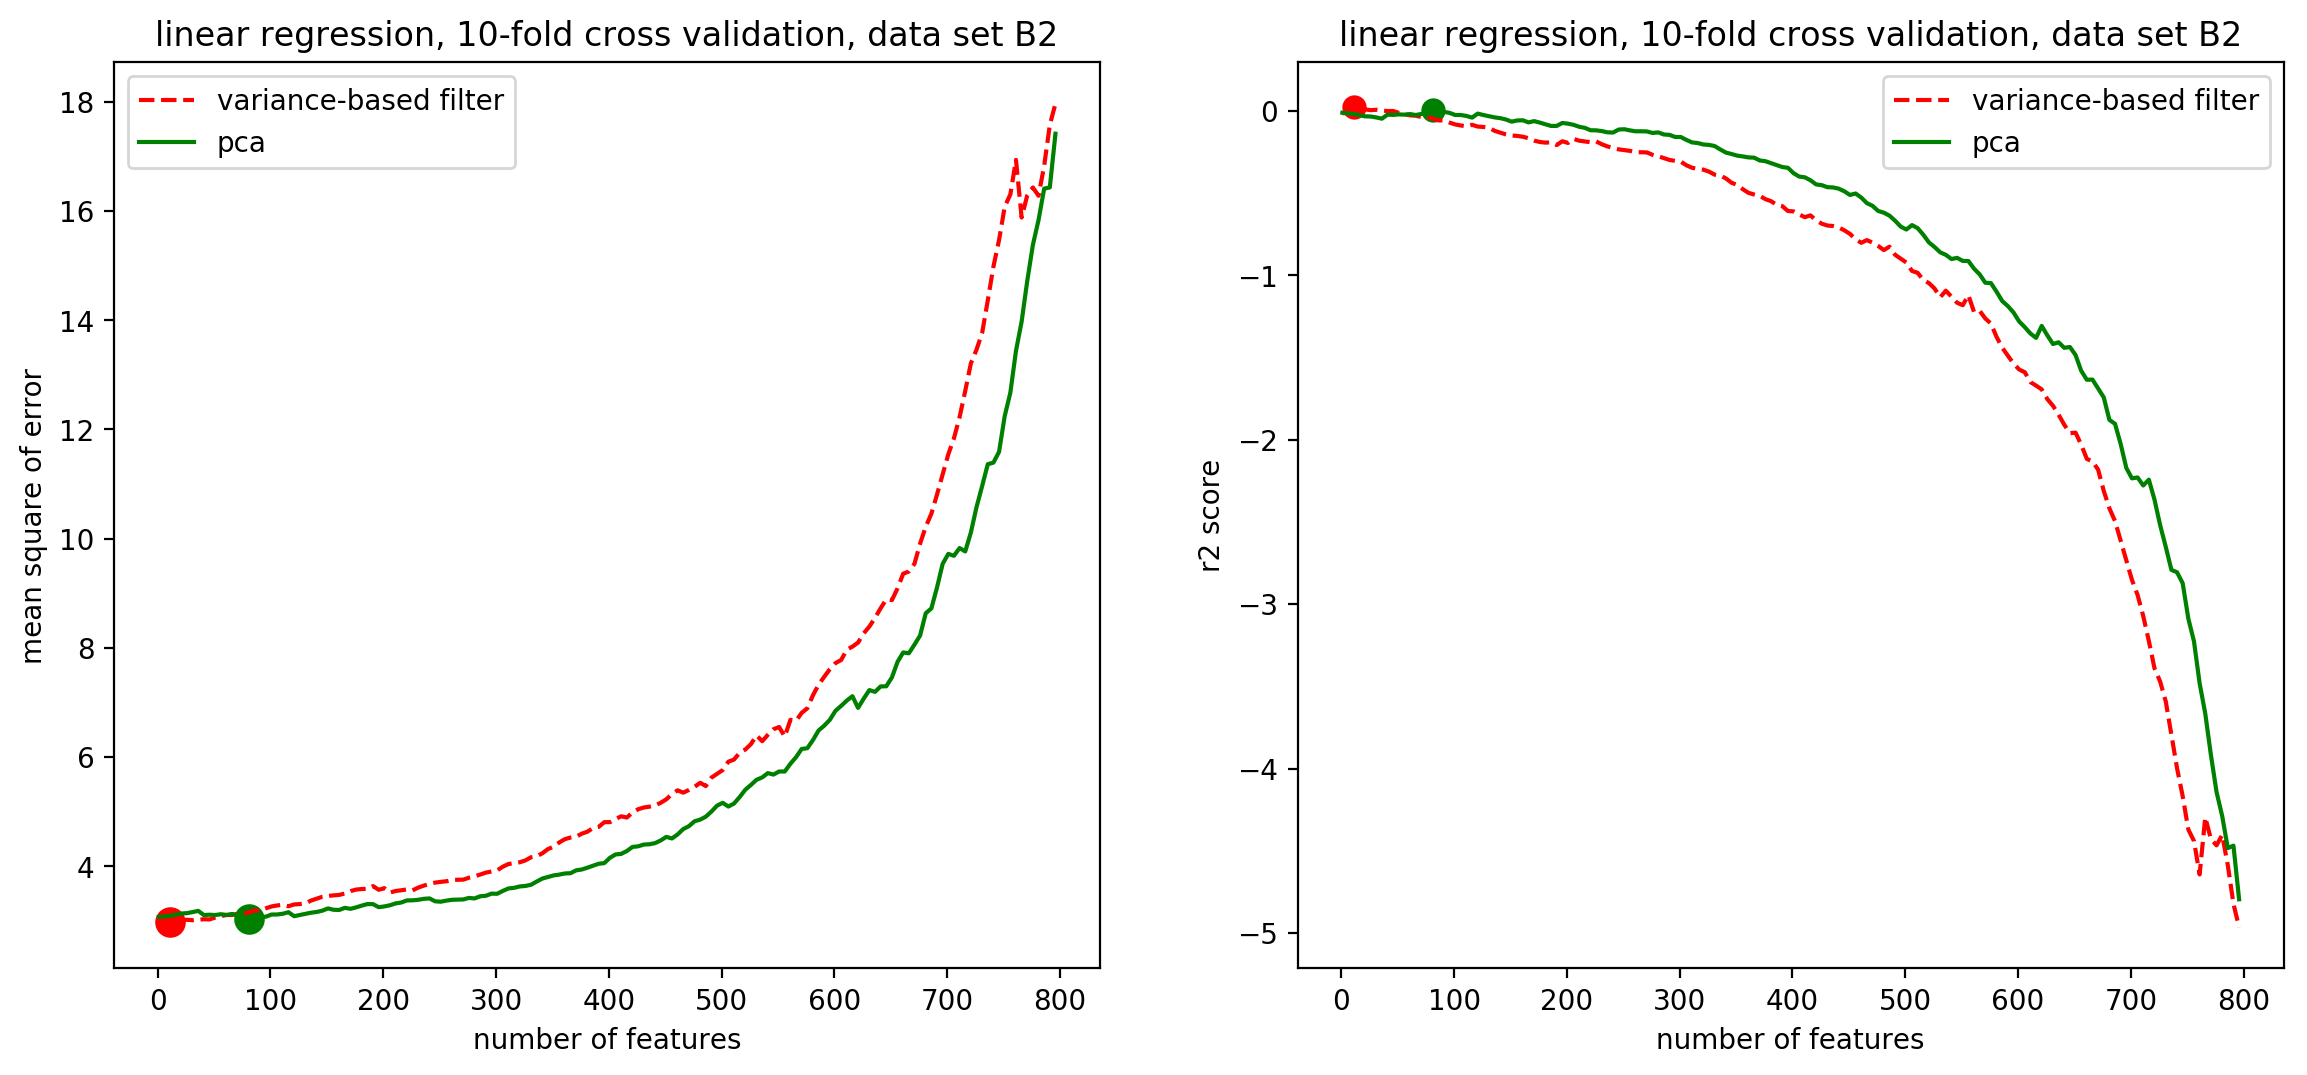

In [54]:
import matplotlib.pyplot as plt
import numpy as np

performances = [performance_filter, performance_pca]
col = ['r', 'g', 'b', 'm']
linestyles = ['--', '-', ':', '-.']
show_line = True


plt.clf()
plt.figure(num=None, figsize=(14, 6), dpi=200, facecolor='w', edgecolor='k')
for i,performance in enumerate(performances):
    mse = [i[0] for i in performance]
    r2 = [i[1] for i in performance]
    #print(performance)
    plt.subplot(1,2,1)
    plt.plot(range(1,nrFeatures, step),[i[0] for i in performance], c = col[i], linestyle = linestyles[i])
    plt.title('linear regression, 10-fold cross validation, data set B2')
    plt.legend(['variance-based filter', 'pca'])
    plt.xlabel('number of features')
    plt.ylabel('mean square of error')
    if show_line:
        #Min, Max = max(mse), min(mse)
        #Min, Max = Min-(Max-Min)/10, Max+(Max-Min)/10
        x,y = (mse.index(min(mse)))*step+1, min(mse)
        plt.scatter(x,y, c = col[i], s =100)

    plt.subplot(1,2,2)
    plt.plot(range(1,nrFeatures, step),[i[1] for i in performance], c = col[i], linestyle = linestyles[i])
    plt.title('linear regression, 10-fold cross validation, data set B2')
    plt.legend(['variance-based filter', 'pca'])
    plt.xlabel('number of features')
    plt.ylabel('r2 score')
    if show_line:
        #Min, Max = max(r2), min(r2)
        #Min, Max = Min-(Max-Min)/10, Max+(Max-Min)/10
        x,y = r2.index(max(r2))*step+1, max(r2)
        plt.scatter(x,y, c = col[i], s =60)

plt.show()



In [52]:
pca_100 = filter_features[:100]
pca_100

[20,
 737,
 541,
 258,
 144,
 718,
 233,
 388,
 433,
 357,
 425,
 664,
 548,
 621,
 499,
 606,
 568,
 413,
 530,
 218,
 482,
 107,
 786,
 592,
 292,
 184,
 223,
 434,
 424,
 199,
 31,
 656,
 87,
 317,
 522,
 555,
 634,
 616,
 38,
 649,
 265,
 384,
 18,
 206,
 269,
 782,
 565,
 304,
 439,
 366,
 417,
 219,
 200,
 180,
 65,
 597,
 145,
 583,
 202,
 444,
 50,
 364,
 476,
 209,
 159,
 710,
 536,
 109,
 338,
 447,
 700,
 716,
 339,
 380,
 44,
 540,
 395,
 509,
 743,
 405,
 665,
 211,
 114,
 22,
 774,
 556,
 722,
 771,
 721,
 259,
 372,
 783,
 69,
 182,
 643,
 352,
 210,
 40,
 148,
 49]

In [50]:
pca_70 = [feature[:70] for feature in pca_features]
pca_70

[array([-2.02712133, -2.36154076,  1.56000505, -3.51586705, -2.23272314,
         3.01810152,  2.94129162, -1.56291584, -1.50641852, -1.8629495 ,
        -0.92898638,  1.97187169,  1.08303381,  2.35085537,  6.61184154,
        -4.30472987, -0.01712523,  0.28003911,  0.33131032,  5.32490742,
         0.57280603,  2.81741568,  3.09991331,  4.36428122, -3.75703401,
        -0.59424436, -4.30554267, -0.31427283,  1.59318817,  1.83944938,
        -0.16945323,  3.86609762,  2.95528082, -1.24946328, -0.66175692,
        -1.78017805,  1.75280223, -0.71466618, -3.09944773, -1.07771078,
         0.39164841,  1.4765179 , -2.55137285, -1.06425845,  1.02527986,
        -0.42379176, -3.05227113,  3.43624503, -0.13550683,  1.40811954,
        -1.78230742,  1.59416645,  3.73837231, -2.2093116 ,  1.12823195,
         1.09845198, -0.98801162, -0.04387496,  0.80585924, -1.20116652,
         3.67066821, -2.60763156, -2.01738142,  4.58435634,  2.57416881,
         4.94009812,  0.61240715, -2.11287949, -1.6

800


<Figure size 432x288 with 0 Axes>

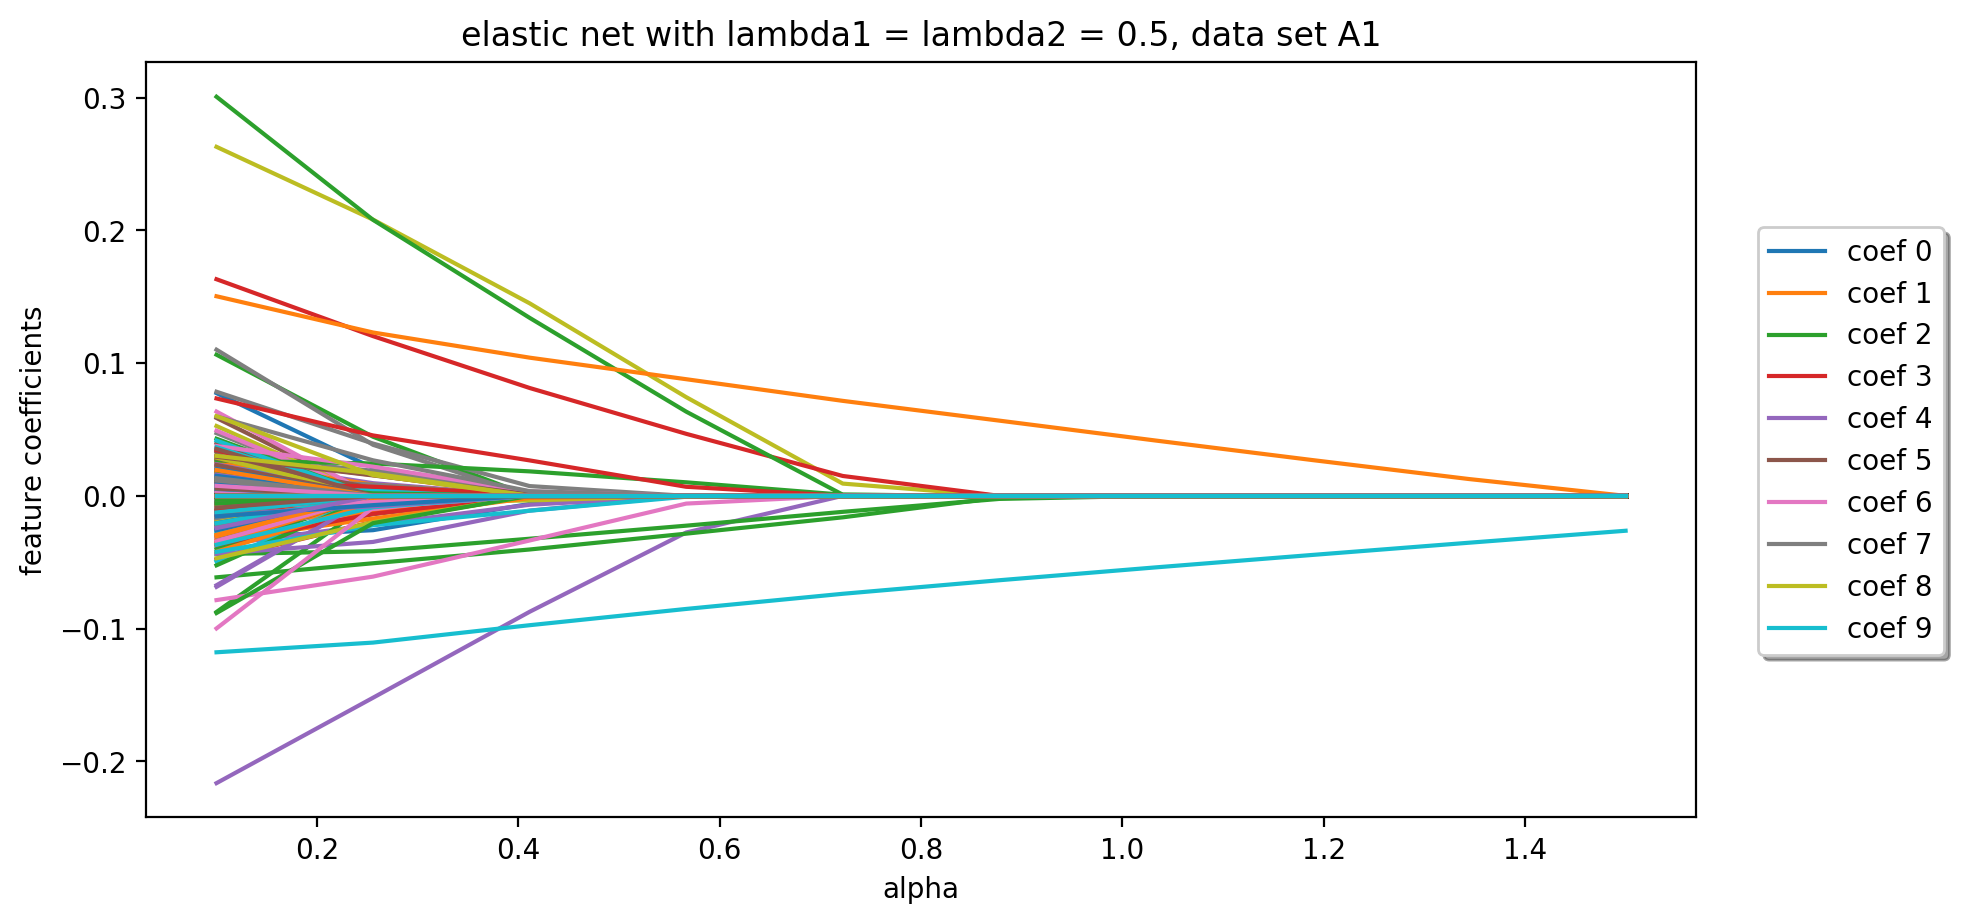

In [705]:
import matplotlib.pyplot as plt
import numpy as np

nrFeatures = xData.shape[1]
print(nrFeatures)
steps = 10
Alpha = np.linspace(0.1,1.5,steps)
coef = elastic_net(xData,yData,Alpha, 0.5)
labels = ['coef ' + str(i) for i in range(0,steps)]
#print(labels)
plt.clf()
plt.figure(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
plt.xlabel('alpha')
plt.ylabel('feature coefficients')

for i in range(nrFeatures): 
    plt.plot(Alpha,[c[i] for c in coef])
    plt.title('elastic net with lambda1 = lambda2 = 0.5, data set A1')

#plt.legend(labels)
plt.legend(labels, loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)


<Figure size 432x288 with 0 Axes>

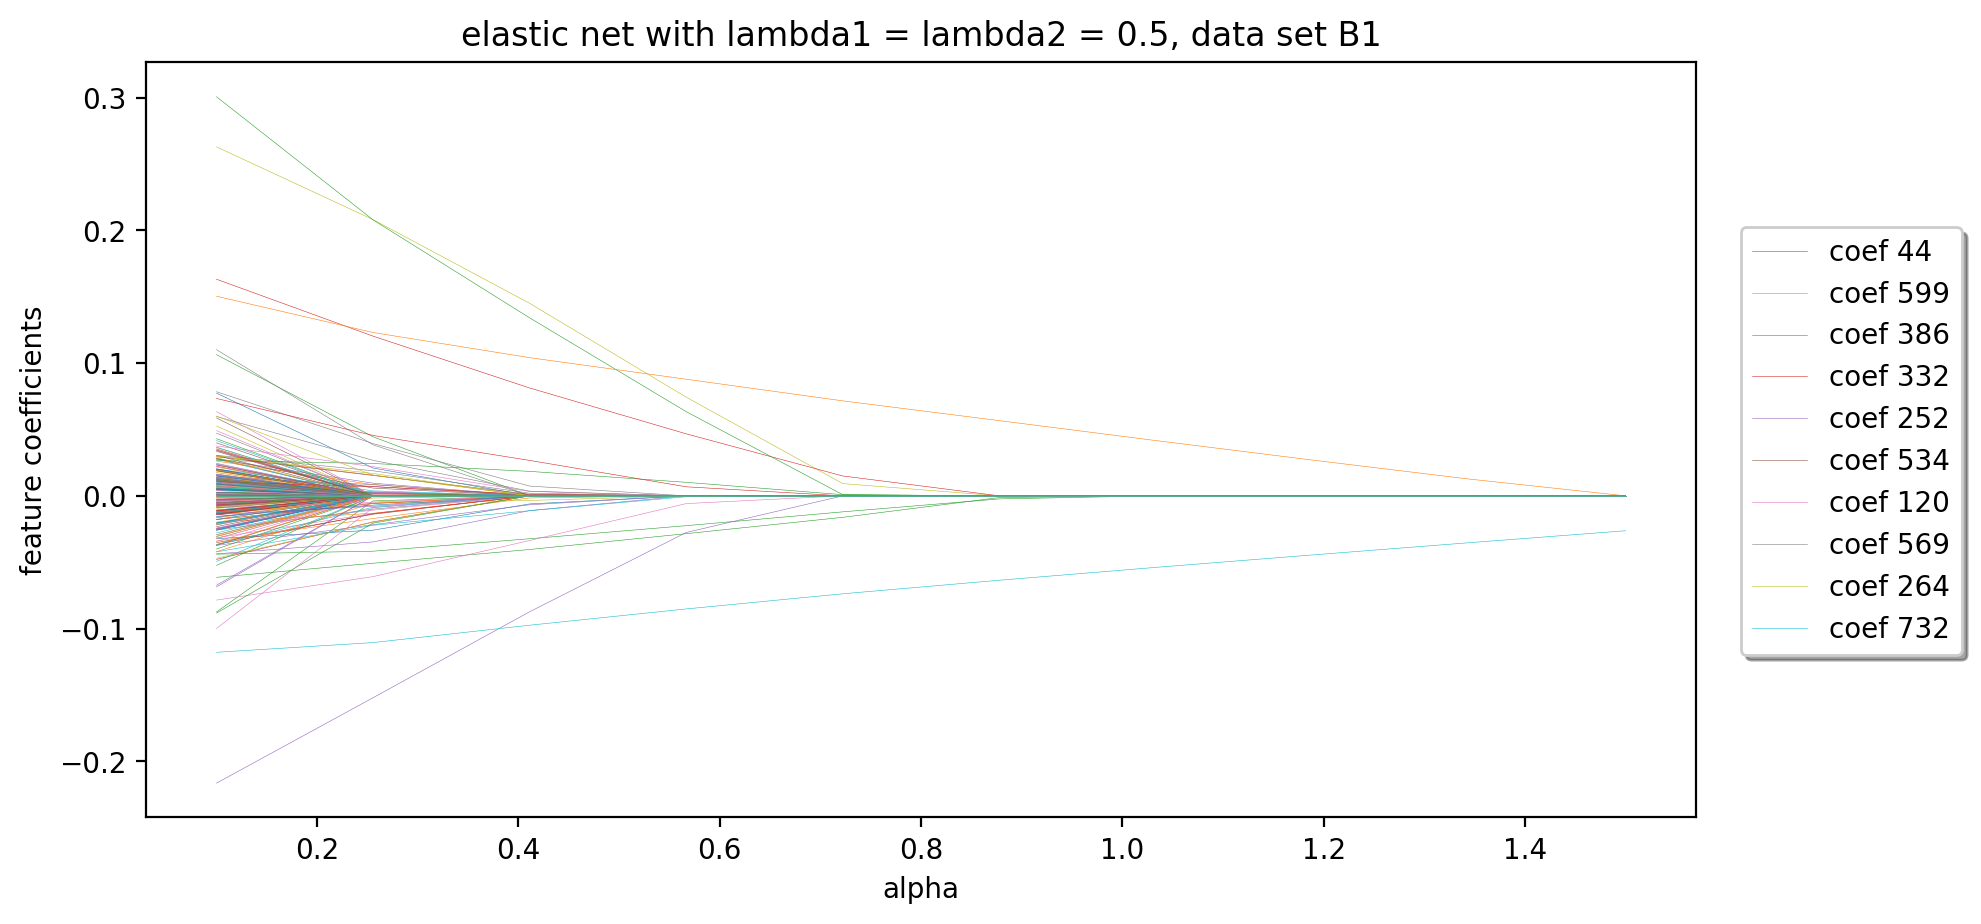

In [746]:
big_coeff = np.argsort(coef[1])[:10]

labels = ['coef ' + str(i) for i in big_coeff]
#print(labels)
plt.clf()
plt.figure(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
plt.xlabel('alpha')
plt.ylabel('feature coefficients')

lines = []
for i in range(nrFeatures): 
    lines.append(plt.plot(Alpha,[c[i] for c in coef], linewidth = 0.2))
    plt.title('elastic net with lambda1 = lambda2 = 0.5, data set B1')

#plt.legend(labels)
plt.legend(labels, loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
